<a href="https://colab.research.google.com/github/geetha57/SkillCraft-task-3/blob/main/skill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== CAT VS DOG SVM CLASSIFICATION ===

1. Loading and preprocessing data...
Creating synthetic sample data...
Created 1000 synthetic samples
Cats: 500, Dogs: 500

2. Extracting features...

3. Splitting data...
Training samples: 800
Testing samples: 200
Training - Cats: 400, Dogs: 400
Testing - Cats: 100, Dogs: 100

4. Creating preprocessing pipeline...
Created pipeline with 3 steps

5. Training SVM model...
Performing grid search for hyperparameter tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-validation score: 1.0000
Model training completed!

6. Evaluating model...

=== MODEL EVALUATION ===
Training Accuracy: 1.0000
Testing Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00       100
         Dog       1.00      1.00      1.00       100

    accuracy                    

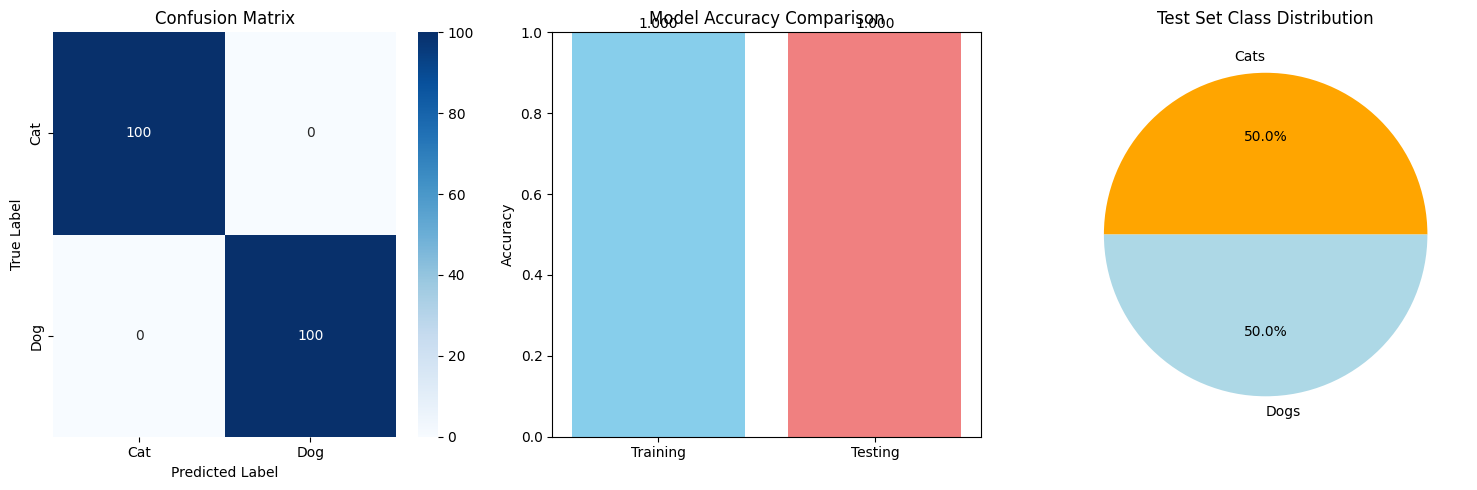


Cross-validation scores:
CV Scores: [1. 1. 1.]
Mean CV Score: 1.0000 (+/- 0.0000)

7. Visualizing sample predictions...


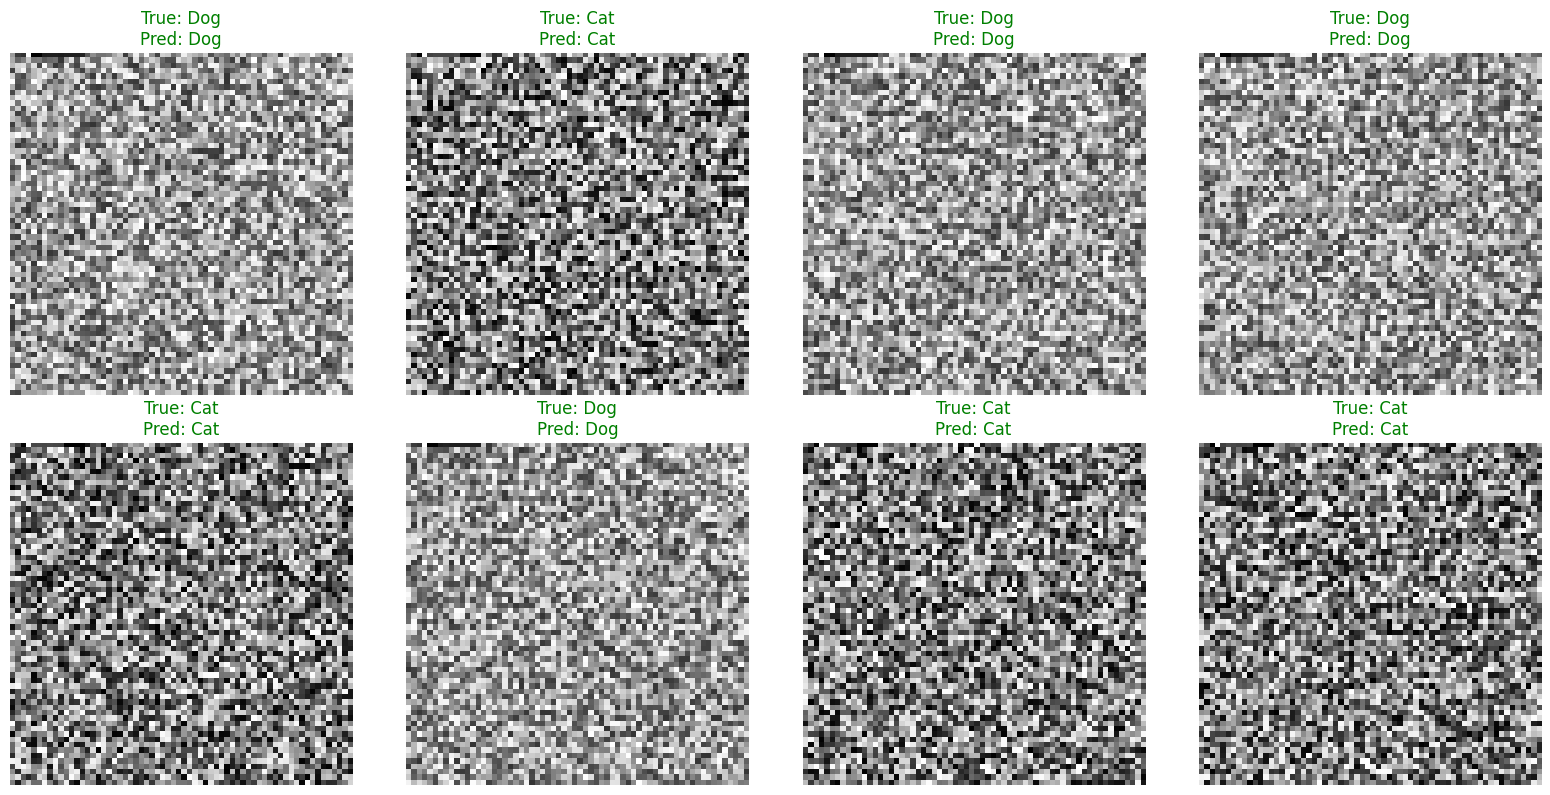


8. Saving model...
Model saved to cat_dog_svm_model.pkl

=== CLASSIFICATION COMPLETE ===


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

class CatDogSVMClassifier:
    def __init__(self, image_size=(64, 64)):  # Fixed: __init__ instead of _init_
        """
        Initialize the Cat vs Dog SVM Classifier

        Parameters:
        image_size (tuple): Size to resize images to (width, height)
        """
        self.image_size = image_size
        self.svm_model = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.pca = None
        self.pipeline = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def load_and_preprocess_images(self, data_dir):
        """
        Load and preprocess images from directory structure

        Parameters:
        data_dir (str): Path to directory containing 'cats' and 'dogs' subdirectories

        Returns:
        X (numpy array): Preprocessed image features
        y (numpy array): Labels (0 for cats, 1 for dogs)
        """
        images = []
        labels = []

        # Expected directory structure:
        # data_dir/
        #   ├── cats/
        #   │   ├── cat1.jpg
        #   │   ├── cat2.jpg
        #   │   └── ...
        #   └── dogs/
        #       ├── dog1.jpg
        #       ├── dog2.jpg
        #       └── ...

        categories = ['cats', 'dogs']

        for category in categories:
            category_path = os.path.join(data_dir, category)
            if not os.path.exists(category_path):
                print(f"Warning: Directory {category_path} not found")
                continue

            label = 0 if category == 'cats' else 1

            for filename in os.listdir(category_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    img_path = os.path.join(category_path, filename)
                    try:
                        # Load and preprocess image
                        img = self.preprocess_image(img_path)
                        if img is not None:
                            images.append(img)
                            labels.append(label)
                    except Exception as e:
                        print(f"Error processing {img_path}: {e}")
                        continue

        if len(images) == 0:
            print("No images found. Creating sample data for demonstration...")
            return self.create_sample_data()

        print(f"Loaded {len(images)} images")
        print(f"Cats: {labels.count(0)}, Dogs: {labels.count(1)}")

        return np.array(images), np.array(labels)

    def preprocess_image(self, img_path):
        """
        Preprocess a single image

        Parameters:
        img_path (str): Path to the image file

        Returns:
        numpy array: Flattened image features
        """
        try:
            # Read image using PIL as fallback for cv2
            try:
                img = cv2.imread(img_path)
                if img is None:
                    # Fallback to PIL
                    img = Image.open(img_path)
                    img = np.array(img)
                else:
                    # Convert BGR to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            except:
                # Use PIL as fallback
                img = Image.open(img_path)
                img = np.array(img)

            # Handle grayscale images
            if len(img.shape) == 2:
                img_gray = img
            else:
                # Resize image first
                img_pil = Image.fromarray(img)
                img_resized = img_pil.resize(self.image_size)
                img_array = np.array(img_resized)

                # Convert to grayscale
                if len(img_array.shape) == 3:
                    img_gray = np.dot(img_array[...,:3], [0.2989, 0.5870, 0.1140])
                else:
                    img_gray = img_array

            # Ensure correct size
            if img_gray.shape != self.image_size:
                img_pil = Image.fromarray(img_gray.astype(np.uint8))
                img_pil = img_pil.resize(self.image_size)
                img_gray = np.array(img_pil)

            # Normalize pixel values
            img_normalized = img_gray.astype(np.float32) / 255.0

            # Flatten the image
            img_flattened = img_normalized.flatten()

            return img_flattened

        except Exception as e:
            print(f"Error preprocessing image {img_path}: {e}")
            return None

    def create_sample_data(self):
        """
        Create sample data for demonstration when no real images are available
        """
        print("Creating synthetic sample data...")

        # Generate synthetic image data
        np.random.seed(42)
        n_samples = 1000
        img_size = self.image_size[0] * self.image_size[1]

        # Create synthetic "cat" images (darker patterns)
        cat_images = np.random.rand(n_samples//2, img_size) * 0.6
        cat_labels = np.zeros(n_samples//2)

        # Create synthetic "dog" images (brighter patterns)
        dog_images = np.random.rand(n_samples//2, img_size) * 0.8 + 0.2
        dog_labels = np.ones(n_samples//2)

        # Combine data
        X = np.vstack([cat_images, dog_images])
        y = np.hstack([cat_labels, dog_labels])

        # Shuffle data
        indices = np.random.permutation(len(X))
        X = X[indices]
        y = y[indices]

        print(f"Created {len(X)} synthetic samples")
        print(f"Cats: {np.sum(y == 0)}, Dogs: {np.sum(y == 1)}")

        return X, y

    def extract_features(self, X):
        """
        Extract additional features from raw pixel data

        Parameters:
        X (numpy array): Raw image data

        Returns:
        numpy array: Feature matrix with additional features
        """
        features = []

        for img in X:
            # Reshape back to 2D for feature extraction
            img_2d = img.reshape(self.image_size)

            # Basic statistical features
            mean_intensity = np.mean(img_2d)
            std_intensity = np.std(img_2d)
            min_intensity = np.min(img_2d)
            max_intensity = np.max(img_2d)

            # Histogram features
            hist, _ = np.histogram(img_2d.flatten(), bins=10, range=(0, 1))
            hist = hist / (np.sum(hist) + 1e-8)  # Normalize with small epsilon

            # Combine features
            feature_vector = np.concatenate([
                [mean_intensity, std_intensity, min_intensity, max_intensity],
                hist,
                img.flatten()  # Include raw pixels
            ])

            features.append(feature_vector)

        return np.array(features)

    def split_data(self, X, y, test_size=0.2):
        """
        Split data into training and testing sets

        Parameters:
        X (numpy array): Feature matrix
        y (numpy array): Labels
        test_size (float): Proportion of data for testing
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"Training samples: {len(self.X_train)}")
        print(f"Testing samples: {len(self.X_test)}")
        print(f"Training - Cats: {np.sum(self.y_train == 0)}, Dogs: {np.sum(self.y_train == 1)}")
        print(f"Testing - Cats: {np.sum(self.y_test == 0)}, Dogs: {np.sum(self.y_test == 1)}")

    def create_pipeline(self, use_pca=True, n_components=100):
        """
        Create a preprocessing and SVM pipeline

        Parameters:
        use_pca (bool): Whether to use PCA for dimensionality reduction
        n_components (int): Number of PCA components
        """
        steps = []

        # Add scaling
        steps.append(('scaler', StandardScaler()))

        # Add PCA if requested
        if use_pca:
            steps.append(('pca', PCA(n_components=n_components)))

        # Add SVM with probability estimation
        steps.append(('svm', SVC(random_state=42, probability=True)))

        self.pipeline = Pipeline(steps)
        print(f"Created pipeline with {len(steps)} steps")

    def train_model(self, use_grid_search=True):
        """
        Train the SVM model

        Parameters:
        use_grid_search (bool): Whether to use grid search for hyperparameter tuning
        """
        if self.pipeline is None:
            self.create_pipeline()

        if use_grid_search:
            print("Performing grid search for hyperparameter tuning...")

            # Define parameter grid (simplified for faster execution)
            param_grid = {
                'svm__C': [0.1, 1, 10],
                'svm__kernel': ['linear', 'rbf'],
                'svm__gamma': ['scale', 'auto']
            }

            # Perform grid search
            grid_search = GridSearchCV(
                self.pipeline,
                param_grid,
                cv=3,  # Reduced CV folds for faster execution
                scoring='accuracy',
                n_jobs=-1,
                verbose=1
            )

            grid_search.fit(self.X_train, self.y_train)

            self.pipeline = grid_search.best_estimator_

            print(f"Best parameters: {grid_search.best_params_}")
            print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

        else:
            print("Training SVM with default parameters...")
            self.pipeline.fit(self.X_train, self.y_train)

        print("Model training completed!")

    def evaluate_model(self):
        """
        Evaluate the trained model
        """
        if self.pipeline is None:
            print("Please train the model first")
            return

        # Make predictions
        y_pred_train = self.pipeline.predict(self.X_train)
        y_pred_test = self.pipeline.predict(self.X_test)

        # Calculate accuracies
        train_accuracy = accuracy_score(self.y_train, y_pred_train)
        test_accuracy = accuracy_score(self.y_test, y_pred_test)

        print(f"\n=== MODEL EVALUATION ===")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Testing Accuracy: {test_accuracy:.4f}")

        # Classification report
        print(f"\nClassification Report (Test Set):")
        print(classification_report(self.y_test, y_pred_test,
                                  target_names=['Cat', 'Dog']))

        # Confusion matrix
        cm = confusion_matrix(self.y_test, y_pred_test)

        plt.figure(figsize=(15, 5))

        # Plot confusion matrix
        plt.subplot(1, 3, 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

        # Plot accuracy comparison
        plt.subplot(1, 3, 2)
        accuracies = [train_accuracy, test_accuracy]
        labels = ['Training', 'Testing']
        colors = ['skyblue', 'lightcoral']
        plt.bar(labels, accuracies, color=colors)
        plt.title('Model Accuracy Comparison')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        for i, v in enumerate(accuracies):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

        # Plot class distribution
        plt.subplot(1, 3, 3)
        class_counts = [np.sum(self.y_test == 0), np.sum(self.y_test == 1)]
        plt.pie(class_counts, labels=['Cats', 'Dogs'], autopct='%1.1f%%',
                colors=['orange', 'lightblue'])
        plt.title('Test Set Class Distribution')

        plt.tight_layout()
        plt.show()

        # Cross-validation
        print(f"\nCross-validation scores:")
        cv_scores = cross_val_score(self.pipeline, self.X_train, self.y_train, cv=3)
        print(f"CV Scores: {cv_scores}")
        print(f"Mean CV Score: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")

    def predict_image(self, img_path):
        """
        Predict the class of a single image

        Parameters:
        img_path (str): Path to the image file

        Returns:
        tuple: (predicted_class, confidence)
        """
        if self.pipeline is None:
            print("Please train the model first")
            return None, None

        # Preprocess the image
        img_features = self.preprocess_image(img_path)

        if img_features is None:
            print(f"Could not process image: {img_path}")
            return None, None

        # Extract additional features
        img_features = self.extract_features(img_features.reshape(1, -1))

        # Make prediction
        prediction = self.pipeline.predict(img_features)[0]

        # Get prediction probability
        probabilities = self.pipeline.predict_proba(img_features)[0]
        confidence = np.max(probabilities)

        class_name = 'Cat' if prediction == 0 else 'Dog'

        print(f"Prediction: {class_name}")
        print(f"Confidence: {confidence:.4f}")

        return class_name, confidence

    def visualize_sample_predictions(self, n_samples=8):
        """
        Visualize sample predictions from the test set

        Parameters:
        n_samples (int): Number of samples to visualize
        """
        if self.pipeline is None:
            print("Please train the model first")
            return

        # Get random samples from test set
        indices = np.random.choice(len(self.X_test), min(n_samples, len(self.X_test)), replace=False)

        # Make predictions
        sample_predictions = self.pipeline.predict(self.X_test[indices])

        # Create visualization
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()

        for i, idx in enumerate(indices):
            # Reshape image for display
            img = self.X_test[idx][:self.image_size[0]*self.image_size[1]]
            img = img.reshape(self.image_size)

            # Plot image
            axes[i].imshow(img, cmap='gray')

            # Add title with prediction and true label
            true_label = 'Cat' if self.y_test[idx] == 0 else 'Dog'
            pred_label = 'Cat' if sample_predictions[i] == 0 else 'Dog'

            color = 'green' if true_label == pred_label else 'red'
            axes[i].set_title(f'True: {true_label}\nPred: {pred_label}', color=color)
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

    def save_model(self, filepath='cat_dog_svm_model.pkl'):
        """
        Save the trained model

        Parameters:
        filepath (str): Path to save the model
        """
        if self.pipeline is None:
            print("Please train the model first")
            return

        try:
            import joblib
            joblib.dump(self.pipeline, filepath)
            print(f"Model saved to {filepath}")
        except ImportError:
            print("joblib not available. Cannot save model.")

    def load_model(self, filepath):
        """
        Load a pre-trained model

        Parameters:
        filepath (str): Path to the saved model
        """
        try:
            import joblib
            self.pipeline = joblib.load(filepath)
            print(f"Model loaded from {filepath}")
        except ImportError:
            print("joblib not available. Cannot load model.")
        except FileNotFoundError:
            print(f"Model file not found: {filepath}")

# Complete workflow example
def run_cat_dog_classification(data_dir=None):
    """
    Run the complete cat vs dog classification workflow

    Parameters:
    data_dir (str): Path to directory containing image data
    """
    print("=== CAT VS DOG SVM CLASSIFICATION ===")

    # Initialize classifier
    classifier = CatDogSVMClassifier(image_size=(64, 64))

    # Load and preprocess data
    print("\n1. Loading and preprocessing data...")
    if data_dir and os.path.exists(data_dir):
        X, y = classifier.load_and_preprocess_images(data_dir)
    else:
        X, y = classifier.create_sample_data()

    # Extract features
    print("\n2. Extracting features...")
    X_features = classifier.extract_features(X)

    # Split data
    print("\n3. Splitting data...")
    classifier.split_data(X_features, y)

    # Create pipeline
    print("\n4. Creating preprocessing pipeline...")
    classifier.create_pipeline(use_pca=True, n_components=100)

    # Train model
    print("\n5. Training SVM model...")
    classifier.train_model(use_grid_search=True)

    # Evaluate model
    print("\n6. Evaluating model...")
    classifier.evaluate_model()

    # Visualize predictions
    print("\n7. Visualizing sample predictions...")
    classifier.visualize_sample_predictions()

    # Save model
    print("\n8. Saving model...")
    classifier.save_model()

    print("\n=== CLASSIFICATION COMPLETE ===")

    return classifier

# Example usage
if __name__ == "__main__":  # Fixed: __name__ and __main__ instead of _name_ and _main_
    # Option 1: Use with real dataset
    # classifier = run_cat_dog_classification('path/to/kaggle/cats_and_dogs_dataset')

    # Option 2: Use with sample data (for demonstration)
    classifier = run_cat_dog_classification()

    # Example of predicting a single image
    # classifier.predict_image('path/to/single/image.jpg')